# Data Analysis & Data engineer & Data scientists

## 1. Data Clean

### 1.1Module import

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2  drop superfluous column

In [60]:
drop_list = {'da':'Unnamed: 0','ds':['Unnamed: 0','index']}
#1.DA data drop the column with the name 'Unnamed: 0'
#2.DS data drop the column 0

### 1.3  Clean Salary column

In [61]:
def clean_Salary(df, job_name):
# Create a method named clean_salary
    df[['low_salary','high_salary']] = df['Salary Estimate'].str.split('-', expand = True) 
    # split column Salary Estimate into posted low_salary and high_salary at
    df['low_salary']=df['low_salary'].str.extract('(\d+k|\d+\.\d+|\d+ \d+|\d+)') 
    #Extraction of digital
    df['low_salary'] = df['low_salary'].fillna('-1') 
    #fillna for the column "low_salary"
    df['low_salary'] = df['low_salary'].astype('int')
    # Change the attribute of the low_salary column to int
    df['low_salary'] = df['low_salary']*1000
    # Convert to numeric units
    df['high_salary']= df['high_salary'].str.extract('(\d+k|\d+\.\d+|\d+ \d+|\d+)')
    #Extraction of digital
    df['high_salary'] = df['high_salary'].astype('int')
    # Change the attribute of the low_salary column to int
    df['high_salary'] = df['high_salary']*1000
    # Convert to numeric units

    return df


### 1.4  Clean Company_name column

In [62]:
def clean_Company_Name(df, job_name):
# Create a method named clean_salary
    df[['Company Name','score']] = df['Company Name'].str.split('\n', expand = True)
    # split column Company Name Estimate into posted Company Name and score at
    
    return df

### 1.5  Clean location column

In [63]:
def clean_location(df, job_name):
# Create a method named clean_salary    
    df[['Location','shorthand']] = df['Location'].str.split(',', n=1 ,expand = True)
    # split column Location into posted Location and shorthand at
    
    return df

### 1.6  Clean the number of employees column

In [64]:
def clean_Size(df, job_name):
# Create a method named clean_size
    df[['minimum_ppl','maximum_ppl']] = df['Size'].str.split('to', expand = True)
    # split Size into posted minimum_ppl and maximum_ppl at
    df['maximum_ppl'] = df['maximum_ppl'].fillna('unknown')
    #fillna for the column "maximum_ppl"
    df.loc[df['maximum_ppl'] == 'unknown', 'maximum_ppl'] = df['minimum_ppl']
    #Replace everything that has unkown maximum with a minimum
    df['minimum_ppl'] = df['minimum_ppl'].str.extract('(\d+|\d+\+|-\d)')
    #Extraction of digital from minimum_ppl
    df['maximum_ppl'] = df['maximum_ppl'].str.extract('(\d+|\d+\+|-\d)')
    #Extraction of digital from maximum_ppl

    return df

### 1.7  Clean Revenue column

In [65]:
def clean_Revenue(df, job_name):
# Create a method named clean_Revenue
    df[['minimum_rev','maximum_rev']] = df['Revenue'].str.split('to', expand = True)
    # split Revenue into posted minimum_rev and maximum_rev at
    df['maximum_rev'] = df['maximum_rev'].fillna('unknown')
    #fillna for the column "maximum_rev"
    df.loc[df['maximum_rev'] == 'unknown', 'maximum_rev'] = df['minimum_rev']
    #Replace everything that has unkown maximum with a minimum
    df['minimum_rev'] = df['minimum_rev'].str.replace('Unknown / Non-Applicable', '-1', regex = True )
    #Replace invalid values with numbers for later filtering
    df['minimum_rev'] = df['minimum_rev'].str.extract('(\d+|\d+\+|-\d)')
    #Extraction of digital from minimum_rev
    df['minimum_rev'] = df['minimum_rev'].astype('int')
    # Change the attribute of the minimum_rev column to int
    df['minimum_rev'] = df['minimum_rev']*1000000
    #Convert to numeric units
    df['maximum_rev'] = df['maximum_rev'].str.replace('Unknown / Non-Applicable', '-1', regex = True )
    #Replace invalid values with numbers for later filtering
    df['maximum_rev'] = df['maximum_rev'].str.extract('(\d+|\d+\+|-\d)')
    #Extraction of digital from maximum_rev
    df['maximum_rev'] = df['maximum_rev'].astype('int')
    # Change the attribute of the minimum_rev column to int
    df['maximum_rev'] = df['maximum_rev']*1000000
    #Convert to numeric units
    
    return df

### 1.8  Populate and transform some data

In [66]:
def add_information(df, job_name): 
# Create a method named add_information
    df['minimum_ppl'] = df['minimum_ppl'].fillna(-1)
    #fillna for the column "minimum_ppl"
    df['maximum_ppl'] = df['maximum_ppl'].fillna(-1)
    #fillna for the column "maximum_ppl"
    df['company_age'] = df['Founded'].astype('int')
    # Change the attribute of the Founded column to int
    df['minimum_ppl'] = df['minimum_ppl'].astype('int')
    # Change the attribute of the minimum_ppl column to int
    df['maximum_ppl'] = df['maximum_ppl'].astype('int')
    # Change the attribute of the maximum_ppl column to int
    df['company_age'] = 2020 - df['company_age']
    #Create the enterprise life cycle column
    df['job_category'] = job_name
    #Create a column named job_category
    
    return df

### 1.9  Delete invalid data

In [67]:
def drop_columns(df, job_name):
# Create a method named drop columns
    if job_name in drop_list:
        df = df.drop(drop_list[job_name], axis=1, inplace=False)
    #If the invalid column is in the delete list, it is deleted
    df.drop(['Salary Estimate','Size','Revenue','score'], axis=1, inplace=True)
    #Delete invalid data
    df = df.drop(df[df.Rating < 0].index)
    df = df.drop(df[df.Founded < 0].index)
    df = df.drop(df[df.low_salary < 0].index)
    df = df.drop(df[df.high_salary < 0].index)
    df = df.drop(df[df.minimum_ppl < 0].index)
    df = df.drop(df[df.maximum_ppl < 0].index)
    df = df.drop(df[df.maximum_ppl < 0].index)
    df = df.drop(df[df.minimum_rev < 0].index)
    df = df.drop(df[df.maximum_rev < 0].index)
    df = df.drop(df[df.Industry == '-1'].index)
  
    return df

### 1.10 Method is called to clean up the data

In [68]:
def clean_datas(file_path, job_name):
# Create a method named clean datas
    df = pd.read_csv(file_path, header=0)
    #Perform a read data operation
    df = clean_Salary(df, job_name)
    #Perform the clean_Salary data operation
    df = clean_Company_Name(df, job_name)
    #Perform the clean_Company_Name data operation
    df = clean_location(df, job_name)
    #Perform the clean_location data operation
    df = clean_Size(df, job_name)
    #Perform the clean_Size data operation
    df = clean_Revenue(df, job_name)
    #Perform the clean_Revenue data operation
    df = add_information(df, job_name)
    #Perform the add_information data operation
    df = drop_columns(df, job_name)
    #Perform the drop_columns data operation
  
    return df

### 1.11 Enter parameters to perform the data cleanup

In [69]:
df_da = clean_datas('/Users/logan/Downloads/DataAnalyst.csv','da')
#Cleaning up Data Analysis data
df_de = clean_datas('/Users/logan/Downloads/DataEngineer.csv','de')
#Cleaning up Data engineer data
df_ds = clean_datas('/Users/logan/Downloads/DataScientist.csv','ds')
#Cleaning up Data scientists data

## 2. Date Analysis

### 2.1 Analyze the position distribution of industry and sector

In [70]:
merge_data = pd.concat([df_da,df_de,df_ds], ignore_index = True, sort = False)

In [71]:
Industry_da = df_da.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_da = Industry_da.sort_values(by='count', ascending=False)
Industry_da = Industry_da.nlargest(5, 'count')
Industry_da['job_category']='da'


In [72]:
Industry_de = df_de.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_de = Industry_de.sort_values(by='count', ascending=False)
Industry_de = Industry_de.nlargest(5, 'count')
Industry_de['job_category']='de'


In [73]:
Industry_ds = df_ds.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_ds = Industry_ds.sort_values(by='count', ascending=False)
Industry_ds = Industry_ds.nlargest(5, 'count')
Industry_ds['job_category']='ds'


In [74]:
Sector_da = df_da.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_da = Sector_da.sort_values(by='count', ascending=False)
Sector_da = Sector_da.nlargest(5, 'count')
Sector_da['job_category']='da'


In [75]:
Sector_de = df_de.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_de = Sector_de.sort_values(by='count', ascending=False)
Sector_de = Sector_de.nlargest(5, 'count')
Sector_de['job_category']='de'


In [76]:
Sector_ds = df_ds.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_ds = Sector_ds.sort_values(by='count', ascending=False)
Sector_ds = Sector_ds.nlargest(5, 'count')
Sector_ds['job_category']='ds'

In [77]:
Industry_data = pd.concat([Industry_da,Industry_de,Industry_ds], ignore_index = True, sort = False)

In [78]:
Sector_data = pd.concat([Sector_da,Sector_de,Sector_ds], ignore_index = True, sort = False)

#### 2.1.1 Bar chart display
#### Q: What is the industry/sector distribution among all data analysis positions? Which industry/sector is the most distributed?

#### A: As can be seen from the bar chart, IT services and Information Technology are the positions with the most demand


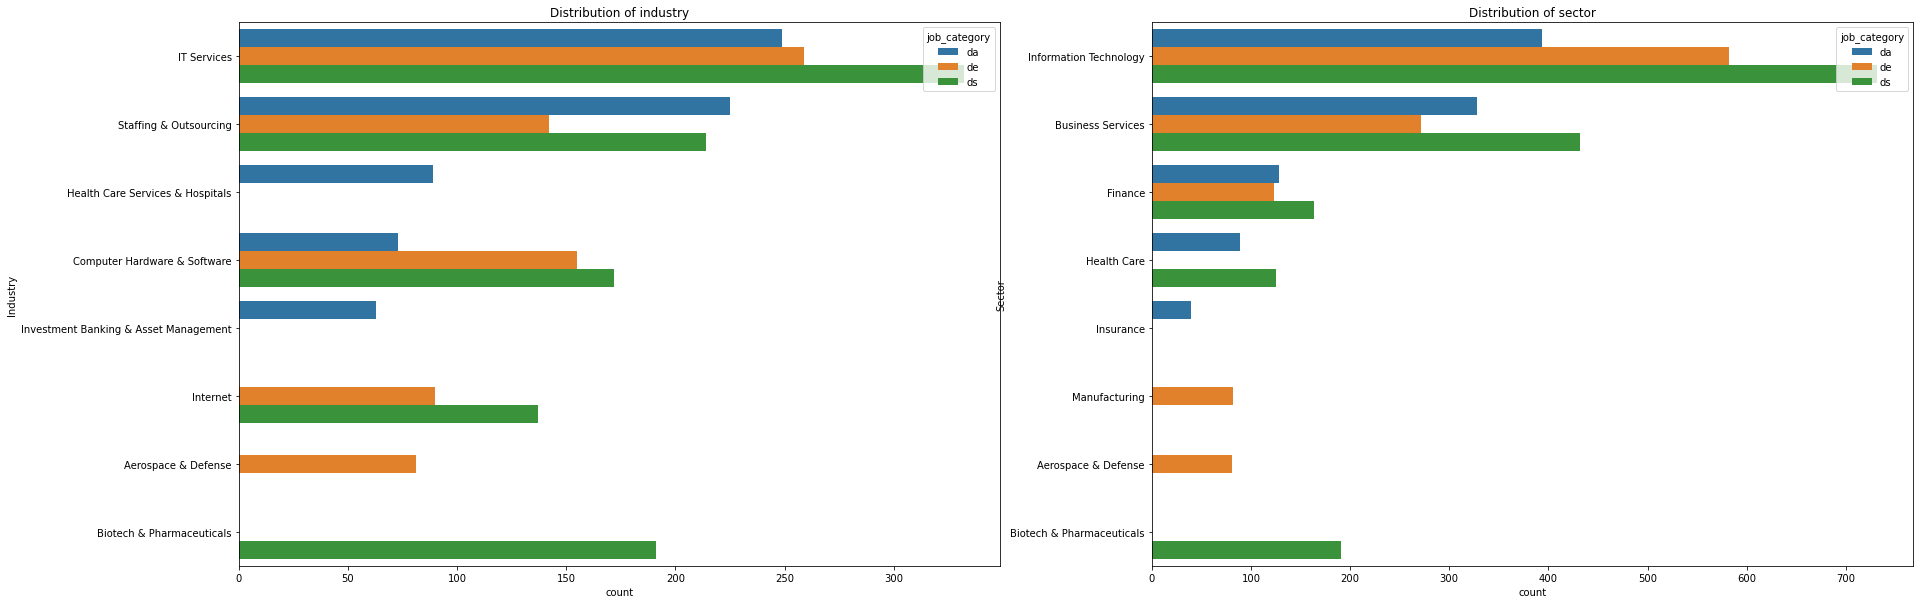

In [79]:

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
axs[0].set_title('Distribution of industry')
sns.barplot(x="count", y="Industry", hue="job_category", data=Industry_data,capsize=.05, ax=axs[0])
axs[1].set_title('Distribution of sector')
sns.barplot(x="count", y="Sector", hue="job_category", data=Sector_data,capsize=.05,ax=axs[1])
plt.show()


### 2.2 Analyze the regional distribution of LOW_SALARY and HIGH_SALARY in the above two classifications

In [80]:
df_salary_location = merge_data.loc[(merge_data['Industry']=='IT Services') & (merge_data['Sector']=='Information Technology')].groupby(['Location','shorthand'], as_index = False).mean()
df_low_salary_location = df_salary_location.sort_values(by='low_salary', ascending=True)
df_low_salary_location = df_low_salary_location[['Location','shorthand','low_salary','high_salary']].reset_index()
df_low_salary_location['shorthand'] = df_low_salary_location['shorthand'].str.strip()

#### 2.2.1 Heat map display
#### Q: What is the distribution of LOW_SALARY across the United States? Which state has the most jobs?
#### A: As can be seen from the Heat map, California has the largest number of jobs, which represents the development of the technology industry in this state

In [81]:
import plotly.graph_objects as go

import pandas as pd

df = df_low_salary_location


fig = go.Figure(data=go.Choropleth(
    locations=df['shorthand'], # Spatial coordinates
    z = df['low_salary'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "low_salary $",
))

fig.update_layout(
    title_text = 'US of low_salary by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [82]:
df_high_salary_location = df_salary_location.sort_values(by='high_salary',ascending=True)
df_high_salary_location = df_high_salary_location[['shorthand','low_salary','high_salary']].reset_index()
df_high_salary_location['shorthand'] = df_high_salary_location['shorthand'].str.strip()

#### 2.2.2 Heat map display
#### Q: What is the distribution of High_SALARY across the United States? Which state has the most jobs?
#### A: As can be seen from the Heat map, California is also a hot spot for high salaries, as is New Jersey, where demand is strong

In [83]:
import plotly.graph_objects as go

import pandas as pd

df = df_high_salary_location


fig = go.Figure(data=go.Choropleth(
    locations=df['shorthand'], # Spatial coordinates
    z = df['high_salary'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greens',
    colorbar_title = "high_salary $",
))

fig.update_layout(
    title_text = 'US of high_salary by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

### 2.3 Analyze the position demand and industry distribution of California cities

In [84]:
df_ca_Industry = merge_data.loc[merge_data['shorthand'].str.contains('CA')]
df_ca_Industry_count = df_ca_Industry.groupby(['Industry','Sector'])["Industry"].count().reset_index(name="count")
df_ca_Industry_count = df_ca_Industry_count.sort_values(by='count', ascending=False).head(6)


In [85]:
location_data = df_ca_Industry.groupby(['Location']).low_salary.agg(['count','mean']).reset_index()

location_data_top6 = location_data.sort_values(by='count', ascending=False).head(6)

#### 2.3.1 The pie chart shows
#### Q: Which cities have the most job opportunities in California, and what is their industry distribution?
#### A: As you can see from the chart, San Diego has the most jobs, with the Computer Hardware & Software industry the most important

[None, Text(0.5, 1.0, 'Hot city in CA state')]

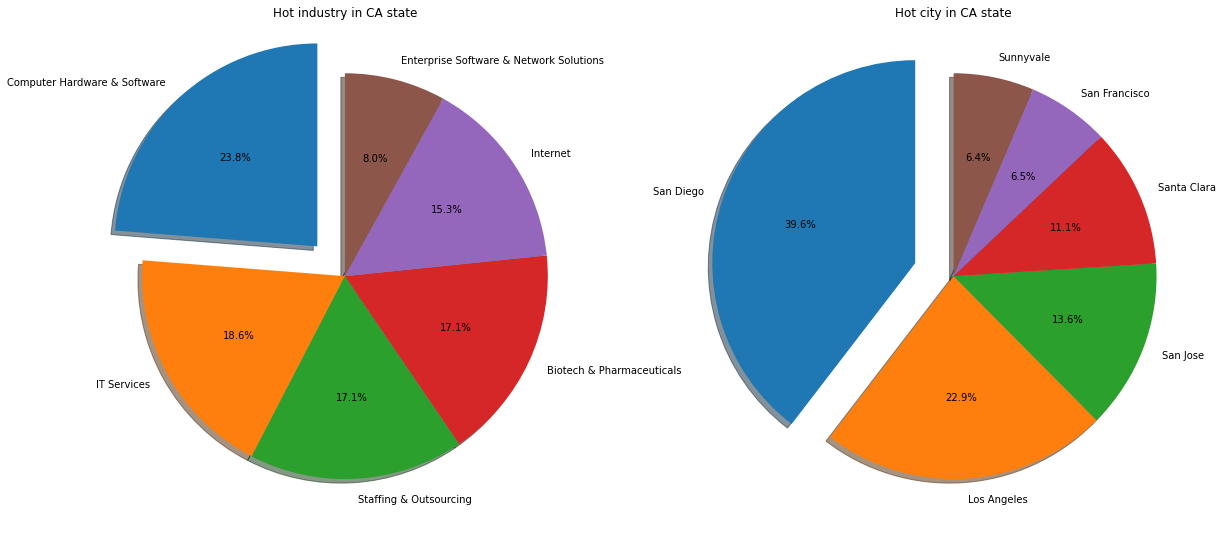

In [86]:


# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize = (20, 10))

# A standard pie plot
axs[0].pie(df_ca_Industry_count['count'], explode =(0.2,0,0,0,0,0), labels=df_ca_Industry_count['Industry'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set(aspect="equal", title='Hot industry in CA state')


# Shift the second slice using explode
axs[1].pie(location_data_top6['count'], explode =(0.2,0,0,0,0,0), labels=location_data_top6['Location'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set(aspect="equal", title='Hot city in CA state')


### 2.4 Distribution of salaries, personnel and revenue by job category

In [87]:
df_category_salary = merge_data.groupby(['job_category'], as_index = False).mean(['low_salary'])

df_category_salary

,job_category,Rating,Founded,low_salary,high_salary,minimum_ppl,maximum_ppl,minimum_rev,maximum_rev,company_age
0,da,3.739303,1974.447761,53703.980100,88989.220564,3278.802653,4572.180763,6.117745e+07,1.108391e+08,45.552239
1,de,3.805325,1976.634163,76860.304288,123930.152144,4149.304288,5390.318119,5.050692e+07,1.118001e+08,43.365837
2,ds,3.775237,1965.370739,81839.488636,134065.814394,4717.497633,5904.900568,5.034896e+07,9.243561e+07,54.629261


#### 2.4.1 Bar chart display
#### Q: What is the distribution of salaries, personnel composition and revenue for different job categories?
#### A: Statistically speaking, the average salary and personnel ratio of DA are lower than that of DE and DS, but from the perspective of the company's revenue, DA is the position that produces the most benefits

<AxesSubplot:title={'center':'average maximum_rev'}, xlabel='job_category', ylabel='maximum_rev'>

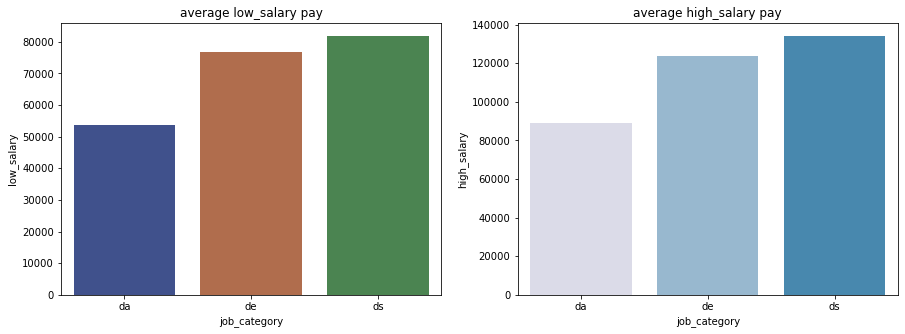

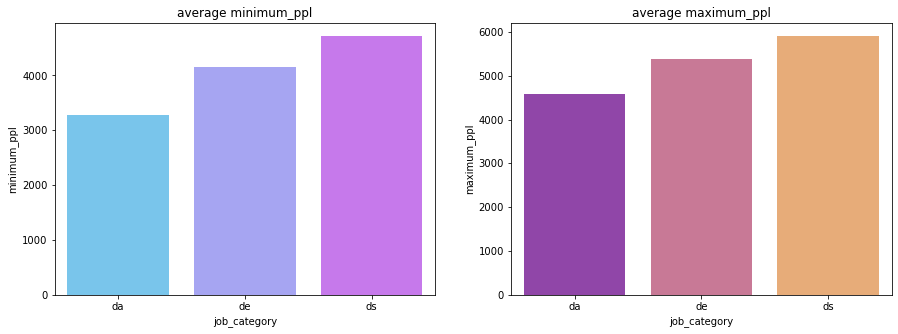

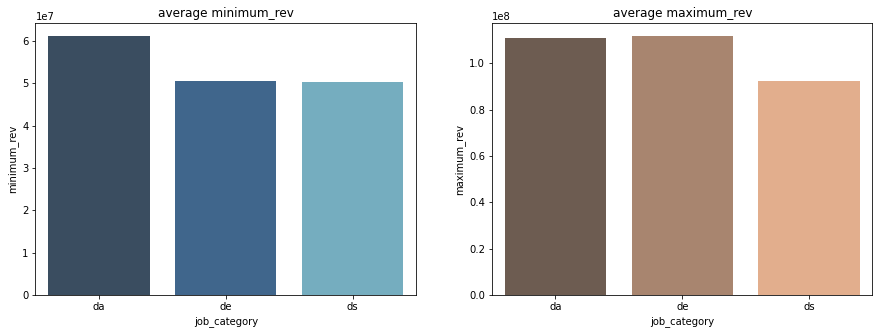

In [88]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average low_salary pay')
sns.barplot(data=df_category_salary, x='job_category', y="low_salary",  ci="sd", palette="dark", alpha=.8, ax=axs[0])
axs[1].set_title('average high_salary pay')
sns.barplot(data=df_category_salary, x="job_category", y="high_salary", ci="sd", palette="PuBu", alpha=.8, ax=axs[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average minimum_ppl')
sns.barplot(data=df_category_salary, x='job_category', y="minimum_ppl",  ci="sd", palette="cool", alpha=.8, ax=axs[0])
axs[1].set_title('average maximum_ppl')
sns.barplot(data=df_category_salary, x='job_category', y="maximum_ppl",  ci="sd", palette="plasma", alpha=.8, ax=axs[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average minimum_rev')
sns.barplot(data=df_category_salary, x='job_category', y="minimum_rev",  ci="sd", palette="ocean", alpha=.8, ax=axs[0])
axs[1].set_title('average maximum_rev')
sns.barplot(data=df_category_salary, x='job_category', y="maximum_rev",  ci="sd", palette="copper", alpha=.8, ax=axs[1])




### 2.5 Line chart display 

#### 2.5.1 It analyzes the distribution of salary and rating, as well as the distribution of salary and personnel in different post types
#### Q: Is the salary related to the number of employees and the rating? What are the noteworthy messages?
#### A: It can be seen from the Rating score that the company with a score of 2.5 has the best salary. From the perspective of the proportion of staff, DA work does not change much, but DE and DS work fluctuate a little when there are around 5000 people

<AxesSubplot:xlabel='maximum_ppl', ylabel='high_salary'>

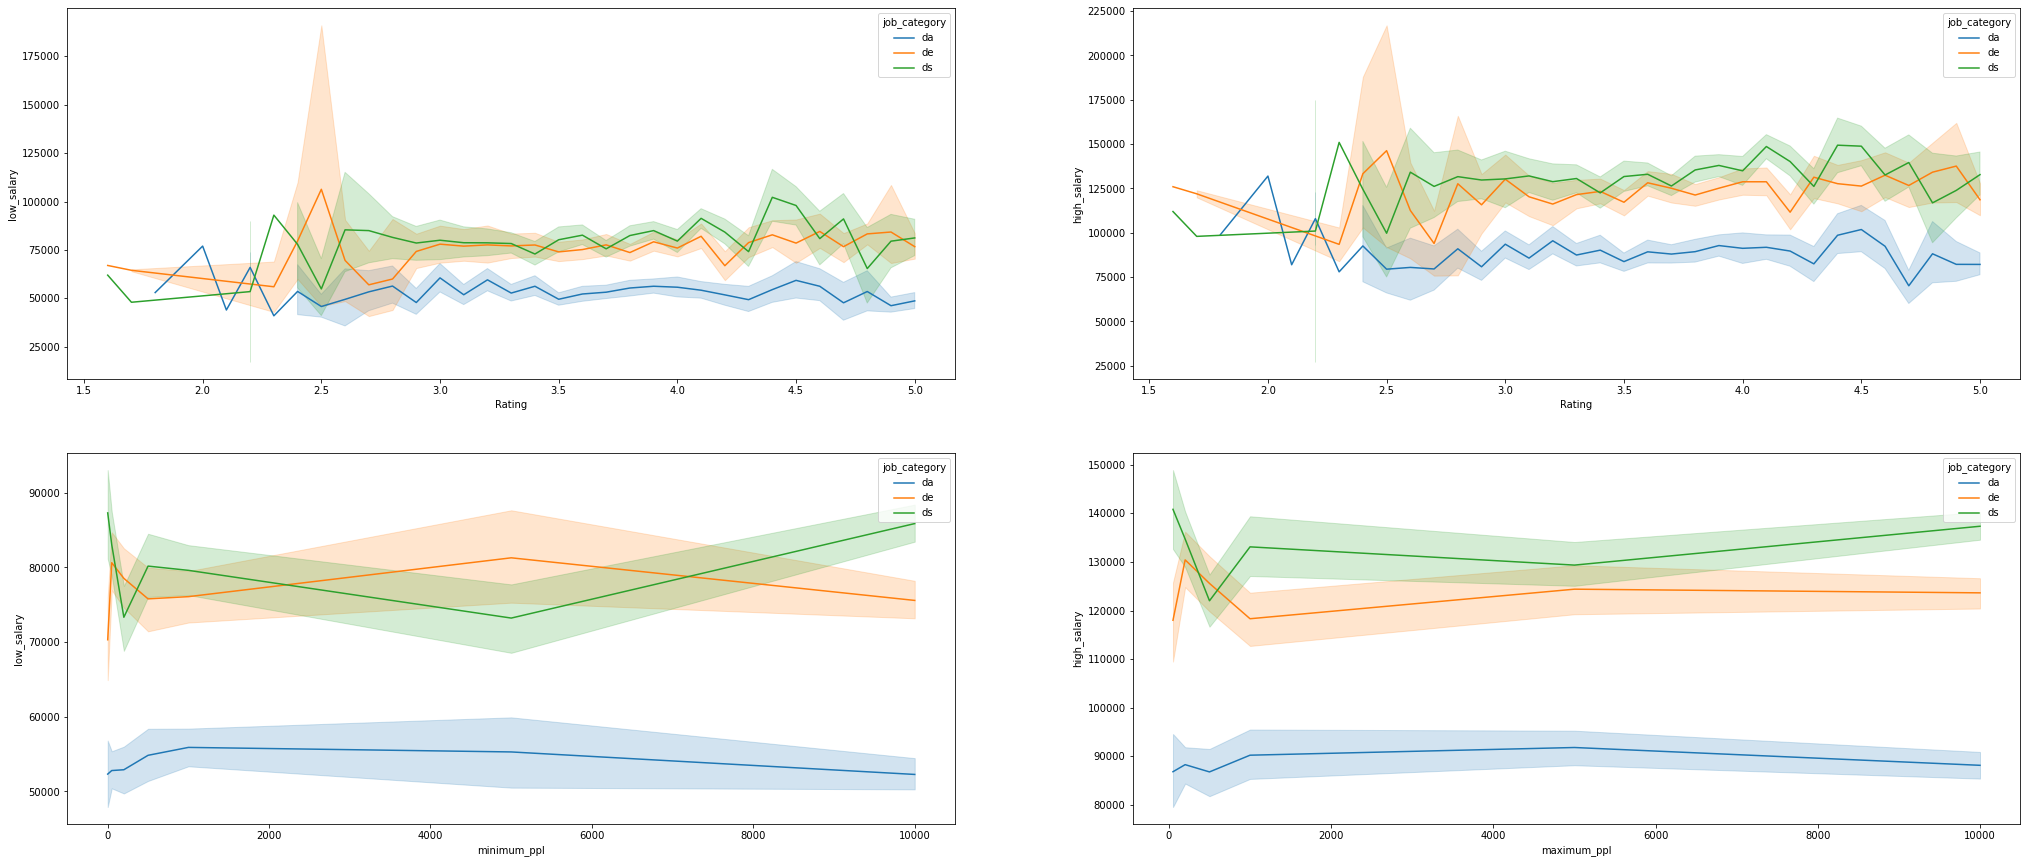

In [89]:
plt.figure(figsize=(35,15))
plt.subplot(2,2,1)
sns.lineplot(x = 'Rating', y = 'low_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,2)
sns.lineplot(x = 'Rating', y = 'high_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,3)
sns.lineplot(x = 'minimum_ppl', y = 'low_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,4)
sns.lineplot(x = 'maximum_ppl', y = 'high_salary', data = merge_data, hue= 'job_category')


### 2.6 The bar chart shows display

#### 2.6.1 Analyze the life cycle distribution of different job categories in the enterprise
#### Q: How is the company's life cycle distributed in different job categories
#### A: As you can see from this bar chart, the maximum enterprise life cycle is around 30 years

<AxesSubplot:title={'center':'ds'}, ylabel='Count'>

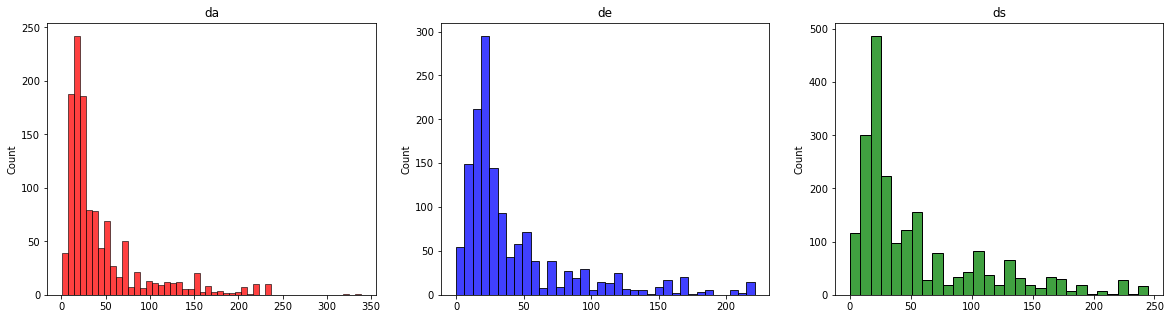

In [90]:
x = df_da['company_age'].values
y = df_de['company_age'].values
z = df_ds['company_age'].values

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
axs[0].set_title('da')
sns.histplot(x, color = 'red',ax=axs[0])
axs[1].set_title('de')
sns.histplot(y, color = 'blue',ax=axs[1])
axs[2].set_title('ds')
sns.histplot(z, color = 'green',ax=axs[2])


### 2.7 Word cloud map display
#### 2.7.1 Analyze the hottest jobs
#### Q: What kind of jobs are most popular?
#### A: As can be seen from the chart, DA is the hottest position

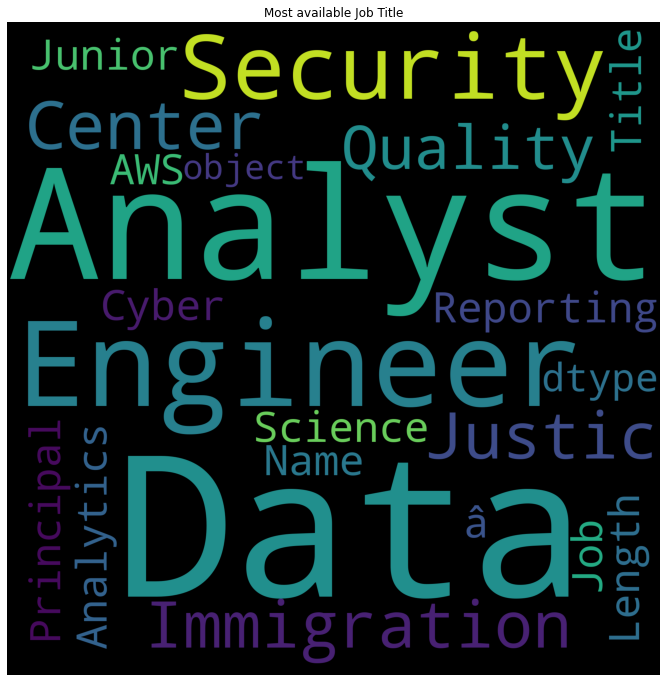

In [91]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(merge_data["Job Title"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Most available Job Title")
plt.show()

## 3.Machine Learning

### 3.1 Set reference values and predicted values

In [92]:
x_df = merge_data[['Job Title', 'Rating', 'Location','Company Name','Type of ownership','Industry','Sector','company_age']]
#x_df = result_df[['location','Domain']]
y_df = merge_data['high_salary']

In [93]:
x_df

,Job Title,Rating,Location,Company Name,Type of ownership,Industry,Sector,company_age
0,"Data Analyst, Center on Immigration and Justic...",3.2,New York,Vera Institute of Justice,Nonprofit Organization,Social Assistance,Non-Profit,59
1,Quality Data Analyst,3.8,New York,Visiting Nurse Service of New York,Nonprofit Organization,Health Care Services & Hospitals,Health Care,127
2,Data Analyst,4.1,New York,Celerity,Subsidiary or Business Segment,IT Services,Information Technology,18
3,Reporting Data Analyst,3.9,New York,FanDuel,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",11
4,Data Science Analyst,3.7,New York,GNY Insurance Companies,Company - Private,Insurance Carriers,Insurance,106
...,...,...,...,...,...,...,...,...
4759,Principal Data Engineer,4.6,Columbus,ComResource,Company - Private,IT Services,Information Technology,29
4760,Cyber Security Data Engineer,3.9,Dublin,ApTask,Company - Private,IT Services,Information Technology,10
4761,AWS Data Engineer,4.4,Dublin,Tachyon Technologies,Company - Private,IT Services,Information Technology,9
4762,Data Analyst â Junior,5.0,Columbus,"Staffigo Technical Services, LLC",Company - Private,IT Services,Information Technology,12


### 3.2 Digitized data 

In [94]:
#Encoding qualitative data
from sklearn.preprocessing import LabelEncoder

x_df = x_df.apply(LabelEncoder().fit_transform)
#x_df[['Job title','company name','location','Domain']] = x_df[['Job title','company name','location','Domain']].apply(LabelEncoder().fit_transform)

### 3.3 Split the train data and test data

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, random_state=0)

In [96]:
X_test

,Job Title,Rating,Location,Company Name,Type of ownership,Industry,Sector,company_age
3228,129,10,102,363,11,41,13,30
2052,1319,17,191,492,11,1,4,51
1688,1822,22,169,768,11,0,0,33
2189,2032,26,53,827,1,18,11,7
562,764,22,73,914,1,82,4,20
...,...,...,...,...,...,...,...,...
2433,2181,31,11,497,1,20,4,12
3225,2306,16,102,597,1,4,4,60
45,84,13,150,1091,2,42,10,53
3440,204,33,169,1005,1,48,11,2


### 3.4 Set up a way to evaluate the model

In [97]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### 3.4 Carry out the selection of prediction model

#### 3.4.1 The LinearRegression model is introduced to predict

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [99]:
print(lin_reg.intercept_)

97176.16158973836


In [100]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Job Title,2.107526
Rating,599.355495
Location,101.589586
Company Name,-3.052151
Type of ownership,162.747819
Industry,-151.150022
Sector,475.105905
company_age,-10.260559


#### 3.4.2 The StandardScaler model is introduced to predict

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [102]:
pred = lin_reg.predict(X_test)

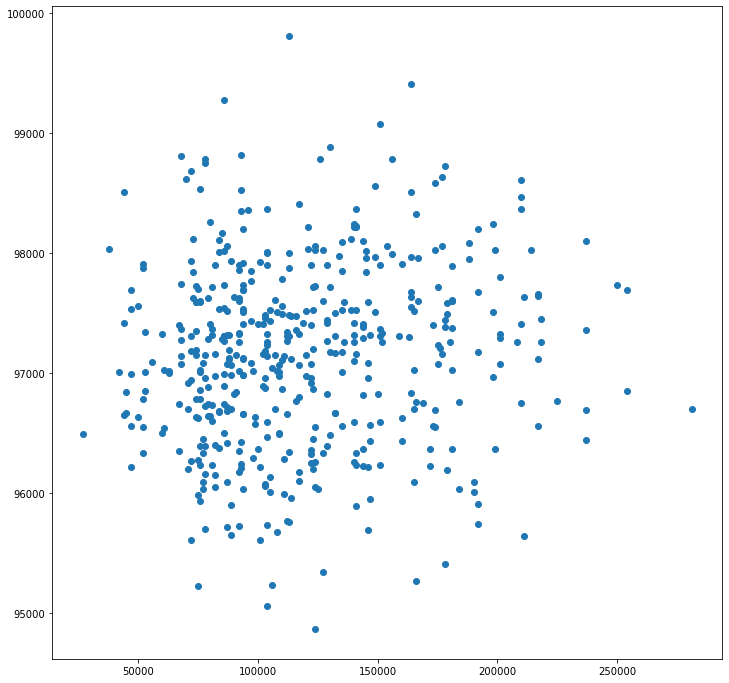

In [105]:
plt.scatter(y_test, pred)

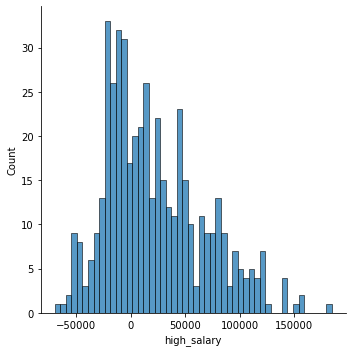

In [106]:
sns.displot((y_test - pred), bins=50);

### 3.5 Evaluate model strengths and weaknesses

In [107]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 37289.12270682639
MSE: 2499872285.5250535
RMSE: 49998.72283893913
R2 Square -0.23151654067299554
Train set evaluation:
_____________________________________
MAE: 37072.0478663078
MSE: 2403631847.969133
RMSE: 49026.84823613622
R2 Square -0.26156688345939116


In [108]:
evaluate_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37289.122707,2.499872e+09,49998.722839,-0.231517,"[-1.785014028780732, -0.08926869078936583, -0...."


In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 36564.8342941227
MSE: 2126737653.406697
RMSE: 46116.56593250084
R2 Square -0.04769856164564912
Train set evaluation:
_____________________________________
MAE: 30067.843766672137
MSE: 1431173044.3250494
RMSE: 37830.847787553605
R2 Square 0.24883649767506832


In [110]:
X_test

array([[-1.43456037e+00, -2.08083459e+00, -2.91503475e-01, ...,
        -3.94480277e-02,  9.49816870e-01, -3.86502384e-01],
       [ 3.01115853e-01, -7.28828242e-01,  1.07589074e+00, ...,
        -1.61847412e+00, -1.12015513e+00,  8.30238496e-02],
       [ 1.03476723e+00,  2.36890579e-01,  7.37883179e-01, ...,
        -1.65794977e+00, -2.04014269e+00, -3.19427208e-01],
       ...,
       [-1.50019518e+00, -1.50140330e+00,  4.45967561e-01, ...,
         2.76246692e-05,  2.59826203e-01,  1.27740634e-01],
       [-1.32516901e+00,  2.36147198e+00,  7.37883179e-01, ...,
         2.36881539e-01,  4.89823092e-01, -1.01253736e+00],
       [ 1.67215421e+00, -5.35684477e-01, -1.65889769e+00, ...,
         2.76246692e-05,  2.59826203e-01,  2.09527914e+00]])

In [111]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 34228.78079976161
MSE: 1886058591.5877943
RMSE: 43428.7760774788
R2 Square 0.07086759364951378
Train set evaluation:
_____________________________________
MAE: 14417.042278785415
MSE: 376485953.4150325
RMSE: 19403.245950485514
R2 Square 0.8023981038038985


In [112]:
evaluate_df_random_forest = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_random_forest

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regression,34228.7808,1.886059e+09,43428.776077,0.070868,"[-2.482263628484242, -0.22902721594515407, -0...."


In [113]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### 3.6 Gradient boost

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=13)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 8,
          'learning_rate': 0.05,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 33124.14537891517
MSE: 1874264103.5793884
RMSE: 43292.771955366734
R2 Square 0.042504555605032635
Train set evaluation:
_____________________________________
MAE: 12808.830787257062
MSE: 373079658.3411253
RMSE: 19315.27008201349
R2 Square 0.8036329401676053


In [116]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,33124.145379,1.874264e+09,43292.771955,0.042505,"[-1.6821319244905575, 0.030529569506392185, 0...."


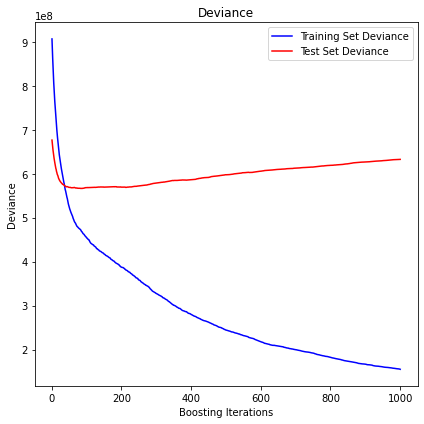

In [117]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

### 3.7 Find the items that are most relevant to your salary

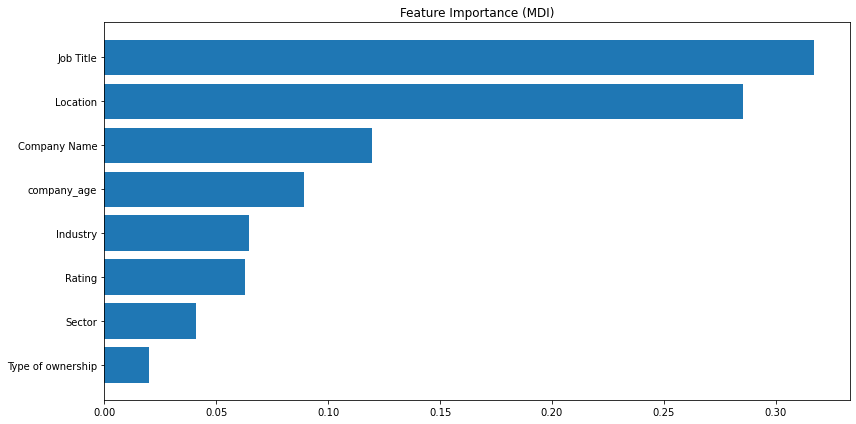

In [118]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()

## 4. classification

### 4.1 Set reference values and predicted values

In [98]:
x_df = merge_data[['Location','Company Name','company_age','low_salary','high_salary']]

y_df = np.where(merge_data['job_category']=='da', 1, 0)

In [99]:
np.count_nonzero(y_df == 1)

1206

### 4.2 Carry out the selection of classification model

In [100]:
from sklearn.preprocessing import LabelEncoder

x_df = x_df.apply(LabelEncoder().fit_transform)

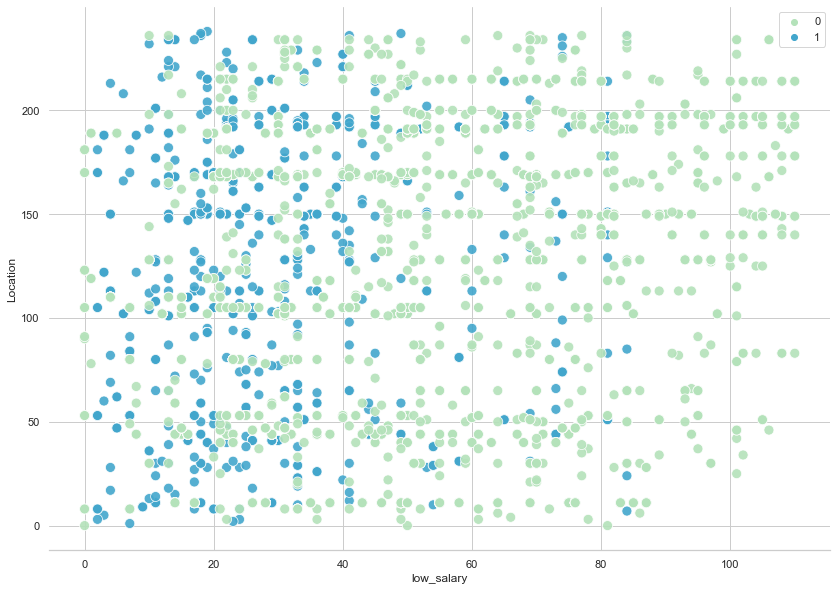

In [102]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='low_salary', y='Location', data=x_df, hue=y_df, palette='GnBu', s=100, alpha=0.9)
sns.despine(left=True)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

In [104]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

def print_evaluate(classifier, y_test, prediction):  
    scores_accuracy = cross_val_score(classifier, x_df, y_df, cv=10, scoring='accuracy')
    scores_f1 = cross_val_score(classifier, x_df, y_df, cv=10, scoring='f1_macro')
    print('K-fold cross-validation results:')
    print(classifier.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(classifier.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())
    print('Classification report: ')
    print(classification_report(y_test, prediction))


## 5. Logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[649,  57],
       [170,  77]])

In [107]:
print_evaluate(logreg, y_test, prediction)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.755
LogisticRegression average f1 is 0.617
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       706
           1       0.57      0.31      0.40       247

    accuracy                           0.76       953
   macro avg       0.68      0.62      0.63       953
weighted avg       0.74      0.76      0.74       953



In [108]:
from sklearn.metrics import roc_curve, auc
def plot_auc(y_test, prediction):
    [fpr, tpr, thr] = roc_curve(y_test, prediction)
    idx = np.min(np.where(tpr > 0.8))
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

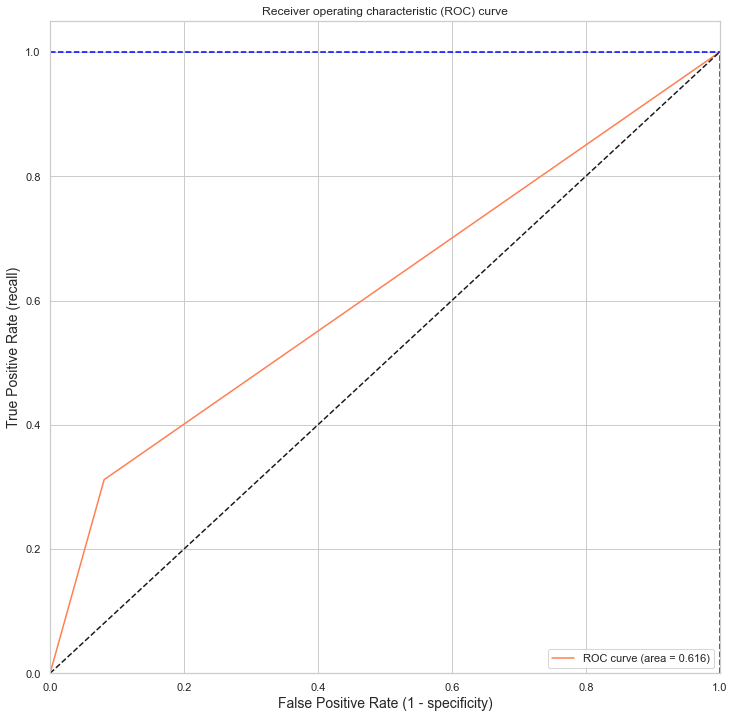

In [109]:
plot_auc(y_test, prediction)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)

In [112]:
print_evaluate(logreg, y_test, prediction)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.755
LogisticRegression average f1 is 0.617
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       706
           1       0.57      0.31      0.40       247

    accuracy                           0.76       953
   macro avg       0.68      0.62      0.63       953
weighted avg       0.74      0.76      0.74       953



## 6. Decision tree 

In [113]:
y_df = merge_data['job_category']

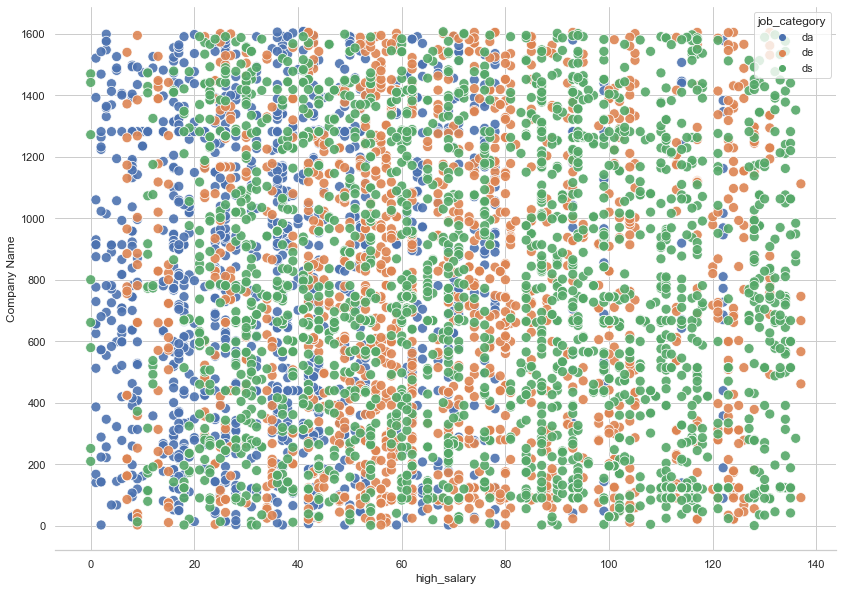

In [115]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='high_salary', y='Company Name', data=x_df, hue=y_df, palette='deep', s=100, alpha=0.9)
sns.despine(left=True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=15)

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

prediction = dtc.predict(X_test)

In [118]:
print_evaluate(dtc, y_test, prediction)

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.481
DecisionTreeClassifier average f1 is 0.454
Classification report: 
              precision    recall  f1-score   support

          da       0.95      0.92      0.94       227
          de       0.97      0.99      0.98       269
          ds       0.96      0.97      0.96       457

    accuracy                           0.96       953
   macro avg       0.96      0.96      0.96       953
weighted avg       0.96      0.96      0.96       953



In [119]:
importance = dtc.feature_importances_
importance

array([0.20378916, 0.01969006, 0.02470285, 0.30152492, 0.450293  ])

### 6.1 Find the items most relevant to the occupation category

<AxesSubplot:>

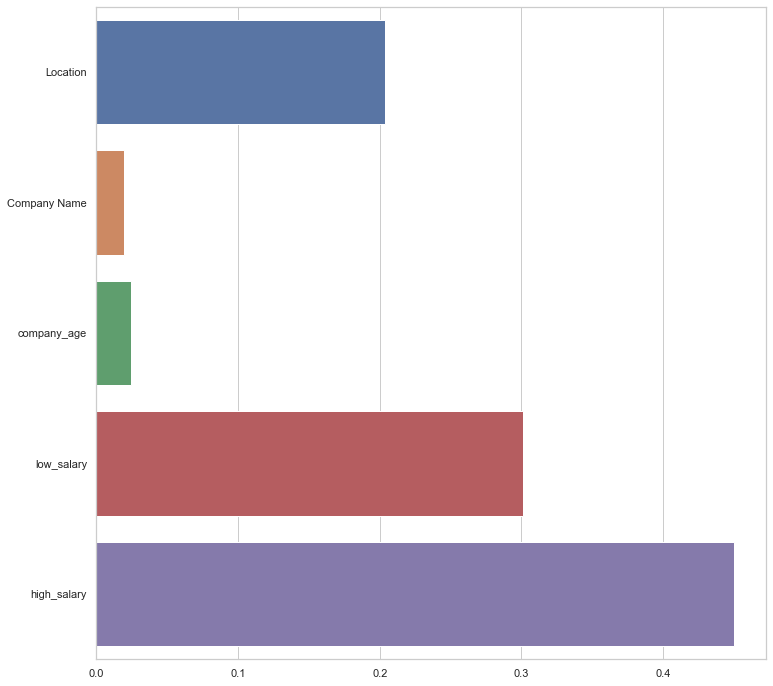

In [120]:
sns.barplot(x=importance, y=x_df.columns)